In [26]:
from rdflib.graph import Graph
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import psutil

/home/jehiannormansaviero/environments/reiva5/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[(1, 3), (1, 5)]


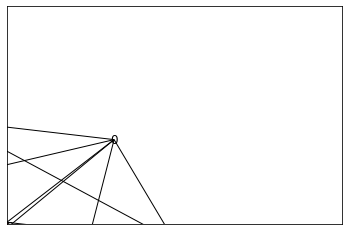

In [27]:
from networkx.algorithms.approximation.steinertree import steiner_tree
import networkx as nx

G = nx.Graph()
G.add_nodes_from([x for x in range(7)])
for u in range(7):
    for v in range(u+1, 7):
        G.add_edge(u,v)

res = steiner_tree(G, [1, 3, 5])
pos = nx.spring_layout(G, scale=0.5)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=res.edges, edge_color='r', arrows=True)
other = []
for x in G.edges:
    if x not in res.edges:
        other.append(x)
nx.draw_networkx_edges(G, pos, edgelist=other, arrows=False)
print(res.edges)
plt.show()

# Useful Method

In [5]:
%%time
# Parse URL into readable information
def getDesc(s):
    curr = -1
    while s.find("/", curr+1) != -1:
        curr = s.find("/", curr+1)
    return s[curr+1:]

hash_table = dict()
value_table = []
last_hash_value = 0

# Doing hash
def encryptHash(s):
    global hash_table
    return hash_table[s]

def decrpytHash(val):
    global value_table
    return value_table[val]

def doHash(s):
    global hash_table
    global last_hash_value
    if s not in hash_table:
        hash_table[s] = last_hash_value
        value_table.append(s)
        last_hash_value += 1Joko_Widodo

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 9.06 µs


# Read RDF Graph

## Read RDF Graph from nt file

### Get data from property edge

In [6]:
%%time
mypath = "/home/jehiannormansaviero/tugas-akhir/tugas-akhir/mapping_properties_chunk"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
WordToLink = dict() # To compress link into simple string
simple_rdfg = dict() #
full_rdfg = dict()
edge_names = dict()
anti_full_rdfg = dict()
vertices_at_edge = dict()
class_type = set()

classOf = "22-rdf-syntax-ns#type"
typeOf = "type"
subClassOf = "rdf-schema#subClassOf"

for filename in tqdm(onlyfiles):
    filename = "mapping_properties_chunk/" + filename

    g = Graph()
    result = g.parse(filename, format="nt")
    G = rdflib_to_networkx_multidigraph(result)

    for stmt in result:
        u, edge, v = [getDesc(x).lower() for x in stmt]
        if u not in WordToLink:
            WordToLink[u] = set()
        WordToLink[u].add(stmt[0])
        
        if edge not in WordToLink:
            WordToLink[edge] = set()
        WordToLink[edge].add(stmt[1])

        if v[:4] == "http":
            if v not in WordToLink:
                WordToLink[v] = set()
            WordToLink[v].add(stmt[2])

#         doHash(u)
#         doHash(edge)
#         doHash(v)
        
#         u = encryptHash(u)
#         edge = encryptHash(edge)
#         v = encryptHash(v)
        
        if u not in simple_rdfg:
            simple_rdfg[u] = set()
        simple_rdfg[u].add(v)

        if u not in edge_names:
            full_rdfg[u] = dict()
            edge_names[u] = dict()
        
        if v not in anti_full_rdfg:
            anti_full_rdfg[v] = dict()
        edge_names[u][v] = edge
        
        if edge not in anti_full_rdfg[v]:
            anti_full_rdfg[v][edge] = set()
        anti_full_rdfg[v][edge].add(u)
        
        if edge not in full_rdfg[u]:
            full_rdfg[u][edge] = set()
        full_rdfg[u][edge].add(v)

        if edge not in vertices_at_edge:
            vertices_at_edge[edge] = []
        vertices_at_edge[edge].append([u,v])

    print(psutil.virtual_memory())
# Plot Networkx instance of RDF Graph
# pos = nx.spring_layout(G, scale=4)
# edge_labels = nx.get_edge_attributes(G, 'r')
# nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
# nx.draw(G, with_labels=True)

  4%|▍         | 1/26 [02:22<59:15, 142.23s/it]

svmem(total=54869778432, available=51270402048, percent=6.6, used=2953199616, free=44248268800, active=9070407680, inactive=957169664, buffers=94359552, cached=7573950464, shared=917504, slab=372051968)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
  8%|▊         | 2/26 [04:32<55:30, 138.76s/it]

svmem(total=54869778432, available=50353315840, percent=8.2, used=3870289920, free=43331141632, active=9984655360, inactive=957169664, buffers=94392320, cached=7573954560, shared=917504, slab=372166656)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 12%|█▏        | 3/26 [07:00<54:09, 141.28s/it]

svmem(total=54869778432, available=49378885632, percent=10.0, used=4844716032, free=42356678656, active=10957799424, inactive=957169664, buffers=94429184, cached=7573954560, shared=917504, slab=372183040)


 15%|█▌        | 4/26 [09:06<50:13, 136.97s/it]

svmem(total=54869778432, available=48418828288, percent=11.8, used=5804781568, free=41396596736, active=11916754944, inactive=957169664, buffers=94445568, cached=7573954560, shared=917504, slab=372260864)


http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
 19%|█▉        | 5/26 [11:36<49:16, 140.78s/it]

svmem(total=54869778432, available=47511904256, percent=13.4, used=6711705600, free=40489635840, active=12822749184, inactive=957169664, buffers=94486528, cached=7573950464, shared=917504, slab=372260864)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 23%|██▎       | 6/26 [13:51<46:22, 139.13s/it]

svmem(total=54869778432, available=46525161472, percent=15.2, used=7698444288, free=39502864384, active=13807939584, inactive=957173760, buffers=94507008, cached=7573962752, shared=917504, slab=372293632)


http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
 27%|██▋       | 7/26 [16:15<44:29, 140.49s/it]

svmem(total=54869778432, available=45831684096, percent=16.5, used=8391921664, free=38809337856, active=14500810752, inactive=957177856, buffers=94552064, cached=7573966848, shared=917504, slab=372318208)


http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
 31%|███       | 8/26 [18:45<42:57, 143.19s/it]

svmem(total=54869778432, available=44830826496, percent=18.3, used=9392775168, free=37808463872, active=15499599872, inactive=957173760, buffers=94576640, cached=7573962752, shared=917504, slab=372363264)


 35%|███▍      | 9/26 [21:11<40:50, 144.14s/it]

svmem(total=54869778432, available=43995770880, percent=19.8, used=10227834880, free=36973387776, active=16333086720, inactive=957173760, buffers=94593024, cached=7573962752, shared=917504, slab=372400128)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 38%|███▊      | 10/26 [23:39<38:45, 145.36s/it]

svmem(total=54869778432, available=43005050880, percent=21.6, used=11218558976, free=35982643200, active=17319202816, inactive=957173760, buffers=94609408, cached=7573966848, shared=917504, slab=372412416)


 42%|████▏     | 11/26 [25:39<34:23, 137.59s/it]

svmem(total=54869778432, available=41785126912, percent=23.8, used=12438482944, free=34762686464, active=18536951808, inactive=957173760, buffers=94638080, cached=7573970944, shared=917504, slab=372416512)


 46%|████▌     | 12/26 [28:14<33:21, 142.98s/it]

svmem(total=54869778432, available=40947257344, percent=25.4, used=13276352512, free=33924784128, active=19373080576, inactive=957177856, buffers=94666752, cached=7573975040, shared=917504, slab=372510720)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 50%|█████     | 13/26 [30:49<31:44, 146.53s/it]

svmem(total=54869778432, available=40103780352, percent=26.9, used=14119825408, free=33081294848, active=20215615488, inactive=957177856, buffers=94683136, cached=7573975040, shared=917504, slab=372547584)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 54%|█████▍    | 14/26 [32:51<27:51, 139.26s/it]

svmem(total=54869778432, available=39079960576, percent=28.8, used=15143649280, free=32057466880, active=21236666368, inactive=957181952, buffers=94687232, cached=7573975040, shared=917504, slab=372588544)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 58%|█████▊    | 15/26 [35:40<27:09, 148.13s/it]

svmem(total=54869778432, available=37962297344, percent=30.8, used=16261308416, free=30938329088, active=22352261120, inactive=958300160, buffers=94781440, cached=7575359488, shared=917504, slab=373182464)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 62%|██████▏   | 16/26 [37:40<23:15, 139.59s/it]

svmem(total=54869778432, available=37225951232, percent=32.2, used=16997654528, free=30201573376, active=23087820800, inactive=958205952, buffers=94797824, cached=7575752704, shared=917504, slab=373592064)


 65%|██████▌   | 17/26 [40:26<22:09, 147.72s/it]

svmem(total=54869778432, available=36090134528, percent=34.2, used=18133475328, free=29065728000, active=24221507584, inactive=958205952, buffers=94822400, cached=7575752704, shared=917504, slab=373620736)


http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 69%|██████▉   | 18/26 [42:27<18:35, 139.43s/it]

svmem(total=54869778432, available=35787227136, percent=34.8, used=18436382720, free=28762791936, active=24524165120, inactive=958210048, buffers=94842880, cached=7575760896, shared=917504, slab=373624832)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 73%|███████▎  | 19/26 [44:28<15:37, 133.91s/it]

svmem(total=54869778432, available=34343378944, percent=37.4, used=19880226816, free=27318931456, active=25965682688, inactive=958210048, buffers=94859264, cached=7575760896, shared=917504, slab=373624832)


 77%|███████▋  | 20/26 [47:19<14:31, 145.27s/it]

svmem(total=54869778432, available=33762836480, percent=38.5, used=20460773376, free=26738360320, active=26544435200, inactive=958210048, buffers=94879744, cached=7575764992, shared=917504, slab=373653504)


http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
 81%|████████  | 21/26 [49:19<11:27, 137.56s/it]

svmem(total=54869778432, available=32915353600, percent=40.0, used=21308256256, free=25890844672, active=27390926848, inactive=958210048, buffers=94912512, cached=7575764992, shared=917504, slab=373866496)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 85%|████████▍ | 22/26 [51:25<08:56, 134.18s/it]

svmem(total=54869778432, available=31788953600, percent=42.1, used=22434656256, free=24764428288, active=28514725888, inactive=958210048, buffers=94928896, cached=7575764992, shared=917504, slab=373944320)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 88%|████████▊ | 23/26 [54:30<07:28, 149.51s/it]

svmem(total=54869778432, available=30992769024, percent=43.5, used=23230832640, free=23968198656, active=29309632512, inactive=958214144, buffers=94978048, cached=7575769088, shared=917504, slab=373850112)


 92%|█████████▏| 24/26 [56:20<04:35, 137.59s/it]

svmem(total=54869778432, available=30132187136, percent=45.1, used=24091418624, free=23107600384, active=30165708800, inactive=958214144, buffers=94990336, cached=7575769088, shared=917504, slab=373637120)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 96%|█████████▌| 25/26 [58:25<02:13, 133.77s/it]

svmem(total=54869778432, available=28876259328, percent=47.4, used=25347346432, free=21851643904, active=31419768832, inactive=958214144, buffers=95014912, cached=7575773184, shared=917504, slab=373649408)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
100%|██████████| 26/26 [1:01:37<00:00, 151.30s/it]

svmem(total=54869778432, available=28120932352, percent=48.7, used=26102677504, free=21096280064, active=32173096960, inactive=958214144, buffers=95047680, cached=7575773184, shared=917504, slab=373678080)
CPU times: user 59min 34s, sys: 2min 8s, total: 1h 1min 43s
Wall time: 1h 1min 37s


### Get data from type edge

In [8]:
%%time
mypath = "/home/jehiannormansaviero/tugas-akhir/tugas-akhir/mapping_type_chunk"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for filename in tqdm(onlyfiles):
    filename = "mapping_type_chunk/" + filename
    g = Graph()
    result = g.parse(filename, format="nt")
    G = rdflib_to_networkx_multidigraph(result)

    for stmt in result:
        u, edge, v = [getDesc(x).lower() for x in stmt]
        if u not in simple_rdfg:
            simple_rdfg[u] = set()
        simple_rdfg[u].add(v)
        if u not in edge_names:
            full_rdfg[u] = dict()
            edge_names[u] = dict()
        if v not in anti_full_rdfg:
            anti_full_rdfg[v] = dict()
        edge_names[u][v] = edge
        if edge not in anti_full_rdfg[v]:
            anti_full_rdfg[v][edge] = set()
        anti_full_rdfg[v][edge].add(u)
        if edge not in full_rdfg[u]:
            full_rdfg[u][edge] = set()
        full_rdfg[u][edge].add(v)
        if edge not in vertices_at_edge:
            vertices_at_edge[edge] = []
        vertices_at_edge[edge].append([u,v])
        if edge == classOf:
            class_type.add(v)
        
        for item in stmt:
            if item[:4] == "http":
                tmp = getDesc(item)
                tmp = tmp.lower()
                if tmp not in WordToLink:
                    WordToLink[tmp] = set()
                WordToLink[tmp].add(item)


100%|██████████| 16/16 [31:38<00:00, 116.07s/it]

CPU times: user 30min 40s, sys: 1min, total: 31min 40s
Wall time: 31min 38s


## Get the RDF Graph

In [9]:
%%time
class_type

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.68 µs


{'academicjournal',
 'activity',
 'actor',
 'administrativearea',
 'administrativeregion',
 'adultactor',
 'agent',
 'aircraft',
 'airline',
 'airport',
 'album',
 'amateurboxer',
 'ambassador',
 'americanfootballleague',
 'americanfootballplayer',
 'americanfootballteam',
 'amphibian',
 'anatomicalstructure',
 'animal',
 'animangacharacter',
 'anime',
 'arachnid',
 'archaea',
 'architect',
 'architecturalstructure',
 'artery',
 'artist',
 'artistdiscography',
 'artwork',
 'astronaut',
 'athlete',
 'australianfootballleague',
 'australianrulesfootballplayer',
 'automobile',
 'automobileengine',
 'autoracingleague',
 'award',
 'bacteria',
 'badmintonplayer',
 'band',
 'baseballleague',
 'baseballplayer',
 'basketballleague',
 'basketballplayer',
 'basketballteam',
 'beachvolleyballplayer',
 'beautyqueen',
 'beverage',
 'biologicaldatabase',
 'biomolecule',
 'bird',
 'bodybuilder',
 'bodyofwater',
 'bone',
 'book',
 'boxer',
 'brain',
 'bridge',
 'britishroyalty',
 'broadcaster',
 'broad

# Create Structural Summary Graph

In [22]:
%%time
structural_summary = nx.Graph()
defined_edges = dict()
property_edges = set()

for u, edges in tqdm(full_rdfg.items()):
    if classOf in edges:
        for current_class in edges[classOf]:
            for edge, vs in edges.items():
                if edge != classOf and edge != typeOf:
                    for v in vs:
                        if u == v : continue
                        if v in full_rdfg and classOf in full_rdfg[v]:
                            for target_class in full_rdfg[v][classOf]:
                                if target_class == current_class: continue
                                if current_class not in defined_edges:
                                    defined_edges[current_class] = dict()
                                defined_edges[current_class][target_class] = edge
                                property_edges.add(edge)
                                structural_summary.add_edge(current_class, target_class)

100%|██████████| 3253755/3253755 [09:28<00:00, 5726.68it/s] 

CPU times: user 9min 28s, sys: 3.11 s, total: 9min 31s
Wall time: 9min 28s


# Read Keyword to Analyze

In [16]:
file_name = 'input.in'
f = open(file_name)
keyword = []
for line in f:
    keyword.extend([' '.join(x.lower().split()) for x in line.strip().split()])
keyword

['unit', 'new', 'york']

In [25]:
print(len(full_rdfg))
print(full_rdfg["new_york"])
print(WordToLinkToLink["new_york"])

3253755
{'largestcity': {'new_york_city'}, 'minimumelevation': {'0.0'}, 'capital': {'albany,_new_york'}, 'demonym': {'new yorker'}, 'areatotal': {'141300000000.0'}, 'name': {'state of new york'}, 'country': {'united_states'}, 'maximumelevation': {'1628.85'}, '22-rdf-syntax-ns#type': {'populatedplace', 'place', 'region', 'owl#thing', 'administrativearea', 'administrativeregion'}}
{rdflib.term.URIRef('http://dbpedia.org/resource/New_York')}


# Get Matching Construct

In [18]:
def get_class_matching_construct(word):
    if word in class_type:
        return [[word]]
    return []

def get_value_matching_construct(word):
    res = set()
    for key in anti_full_rdfg:
        if word in key:
            for edge in anti_full_rdfg[key]:
                for node in anti_full_rdfg[key][edge]:
                    if classOf in full_rdfg[node]:
                        for current_class in full_rdfg[node][classOf]:
                            res.add(current_class)
    return [[x] for x in res]

def get_relationship_matching_construct(word):
    res = []
    if word in vertices_at_edge:
        for u, v in vertices_at_edge[word]:
            if classOf in full_rdfg[u]:
                for current_class in full_rdfg[u][classOf]:
                    if v in full_rdfg and classOf in full_rdfg[v]:
                        for target_class in full_rdfg[v][classOf]:
                            res.append([current_class, target_class])
    return res

def get_property_matching_construct(word):
    res = set()
    if word in vertices_at_edge:
        for u, v in vertices_at_edge[word]:
            if classOf in full_rdfg[u]:
                for current_class in full_rdfg[u][classOf]:
                    res.add(current_class)
    return [[x] for x in res]

In [21]:
%%time
for word in tqdm(keyword):
    print('List of matching construct of word: ' + word)
    print('> Class matching construct: ' + str(get_class_matching_construct(word)))
    print('> Property matching construct: ' + str(get_property_matching_construct(word)))
    print('> Value matching construct: ' + str(get_value_matching_construct(word)))
    print('> Relationship matching construct: ' + str(get_relationship_matching_construct(word)))

  0%|          | 0/3 [00:00<?, ?it/s]

List of matching construct of word: unit
> Class matching construct: []
> Property matching construct: []


 33%|███▎      | 1/3 [00:04<00:09,  4.59s/it]

> Value matching construct: [['playboyplaymate'], ['mountainrange'], ['beachvolleyballplayer'], ['anatomicalstructure'], ['aircraft'], ['railwaytunnel'], ['place'], ['website'], ['country'], ['eukaryote'], ['convention'], ['primeminister'], ['astronaut'], ['researchproject'], ['chef'], ['soccerclubseason'], ['album'], ['historicplace'], ['valley'], ['martialartist'], ['ambassador'], ['railwayline'], ['cyclingteam'], ['company'], ['manga'], ['broadcaster'], ['song'], ['golfleague'], ['species'], ['insect'], ['musicalartist'], ['sportsmanager'], ['theatre'], ['footballmatch'], ['cave'], ['cleric'], ['sportsteammember'], ['film'], ['mineral'], ['creativework'], ['radioprogram'], ['launchpad'], ['mixedmartialartsevent'], ['economist'], ['videogamesleague'], ['cultivatedvariety'], ['unitofwork'], ['prison'], ['webpage'], ['volleyballleague'], ['governor'], ['governmentorganization'], ['televisionseason'], ['officeholder'], ['powerstation'], ['tennisleague'], ['celestialbody'], ['_feature'],

 67%|██████▋   | 2/3 [00:07<00:04,  4.10s/it]

> Value matching construct: [['playboyplaymate'], ['mountainrange'], ['beachvolleyballplayer'], ['aircraft'], ['railwaytunnel'], ['place'], ['website'], ['country'], ['eukaryote'], ['convention'], ['primeminister'], ['researchproject'], ['astronaut'], ['soccerclubseason'], ['chef'], ['historicplace'], ['album'], ['bird'], ['valley'], ['martialartist'], ['ambassador'], ['railwayline'], ['cyclingteam'], ['company'], ['manga'], ['broadcaster'], ['song'], ['golfleague'], ['species'], ['insect'], ['musicalartist'], ['sportsmanager'], ['theatre'], ['footballmatch'], ['cave'], ['cleric'], ['sportsteammember'], ['film'], ['creativework'], ['radioprogram'], ['mixedmartialartsevent'], ['economist'], ['cultivatedvariety'], ['unitofwork'], ['prison'], ['webpage'], ['governor'], ['governmentorganization'], ['televisionseason'], ['nationalfootballleagueseason'], ['officeholder'], ['powerstation'], ['celestialbody'], ['_feature'], ['supremecourtoftheunitedstatescase'], ['currency'], ['skiarea'], ['pr

100%|██████████| 3/3 [00:09<00:00,  3.50s/it]

> Value matching construct: [['playboyplaymate'], ['mountainrange'], ['automobile'], ['publisher'], ['mixedmartialartsleague'], ['software'], ['collegeoruniversity'], ['cyclist'], ['musicgroup'], ['philosopher'], ['organization'], ['saint'], ['presenter'], ['soccerclub'], ['comicscreator'], ['restaurant'], ['amphibian'], ['landmarksorhistoricalbuildings'], ['year'], ['railwaytunnel'], ['tvepisode'], ['place'], ['hockeyteam'], ['judge'], ['olympics'], ['website'], ['country'], ['topicalconcept'], ['animangacharacter'], ['americanfootballplayer'], ['eukaryote'], ['work'], ['givenname'], ['case'], ['convention'], ['grandprix'], ['primeminister'], ['ship'], ['genre'], ['artist'], ['airport'], ['stream'], ['food'], ['soccerleague'], ['writer'], ['royalty'], ['lakebodyofwater'], ['footballleagueseason'], ['soccerclubseason'], ['chef'], ['murderer'], ['tennisplayer'], ['speedwayrider'], ['baseballplayer'], ['careerstation'], ['nationalcollegiateathleticassociationathlete'], ['award'], ['siteo

# Read Profile Graph

In [ ]:
# from http://codereview.stackexchange.com/questions/1526/finding-all-k-subset-partitions

filename = "graph-profile.txt"
profile_graph = set()
for line in open(filename):
    u, edge, v = [getDesc(x).lower() for x in line.strip().split()]
    profile_graph.add((u, edge, v))

# Plot Networkx instance of RDF Graph
# pos = nx.spring_layout(G, scale=4)
# edge_labels = nx.get_edge_attributes(G, 'r')
# nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
# nx.draw(G, with_labels=True)

# Find Pattern Graph

## Create Steiner Tree

In [ ]:
%%time

result_steiner_tree = []
terminal_node = []
for word in tqdm(keyword):
    tmp = []
    tmp.extend(get_class_matching_construct(word))
    tmp.extend(get_property_matching_construct(word))
    tmp.extend(get_value_matching_construct(word))
    tmp.extend(get_relationship_matching_construct(word))
    terminal_node.append(tmp)

ids = [0 for _ in keyword]
result_graphs = set()

def recur(depth):
    global ids
    global terminal_node
    global result_graphs
    if depth == len(ids):
        class_member = []
        for i in range(len(ids)):
            if ids[i] != -1:
                class_member.extend(terminal_node[i][ids[i]])
        result_graphs.add(steiner_tree(structural_summary, list(set(class_member))))
    else:
        awal = -1
        if len(terminal_node[depth]) != 0:
            awal = 0
        for i in range(awal,len(terminal_node[depth])):
            ids[depth] = i
            recur(depth+1)

recur(0)
for result_graph in tqdm(result_graphs):
    for u, v in result_graph.edges:
        if u in defined_edges and v in defined_edges[u]:
            print(u, ' ', defined_edges[u][v], ' ', v)
        else:
            print(v, ' ', defined_edges[v][u], ' ', u)
    print('done')

## Get Pattern Graph from Steiner Tree

In [ ]:
result_pattern_graph = set()
property_member = dict()

def recur_get_entity(depth):
    global class_members
    global result_pattern_graph
    global result_graph
    if depth == len(class_members):
#         print(translator)
        valid = True
        tmp_graph = []
        for u, v in result_graph.edges:
            if u not in defined_edges or v not in defined_edges[u]:
                u, v = v, u
            if translator[u] not in edge_names or translator[v] not in edge_names[translator[u]]:
                valid = False
            if not valid:
                break
            else:
                tmp_graph.append((translator[u], edge_names[translator[u]][translator[v]], translator[v]))
        if valid:
            for u in class_members:
                tmp_graph.append((translator[u], classOf, u))
                tmp_graph.append((translator[u], property_member[u], "$set"))
            result_pattern_graph.add(tuple(tmp_graph))
    else:
        for member in anti_full_rdfg[class_members[depth]][classOf]:
            translator[class_members[depth]] = member
            for edge in full_rdfg[member]:
                if edge != classOf and edge != typeOf and edge not in property_edges:
                    property_member[class_members[depth]] = edge
                    recur_get_entity(depth+1)
    
for result_graph in result_graphs:
    class_members = set()
    translator = dict()
    for u, v in result_graph.edges:
        translator[u] = ""
        translator[v] = ""
        class_members.add(u)
        class_members.add(v)
    class_members = list(class_members)
#     print(class_members)
    recur_get_entity(0)
    
result_pattern_graph = list(result_pattern_graph)
result_pattern_graph

# Find Graph Profile match Graph Pattern

## Measuring Similarity Between Pattern and Profile Graph

### Extrinsic Similarity

#### Concept Similarity

In [ ]:
def cs(P, U):
    class_member_p = set()
    class_member_u = set()
    both = 0
    for u, edge, v in P:
        if edge == classOf or edge == typeOf:
            class_member_p.add(v)
    for u, edge, v in U:
        if edge == classOf or edge == typeOf:
            class_member_u.add(v)
            if v in class_member_p:
                both += 1
    print(class_member_p)
    print(class_member_u)
    return (both)/(len(class_member_p) + len(class_member_u) - both)

cs(result_pattern_graph[0], result_pattern_graph[1])

#### Relationship Similarity

In [ ]:
def rs(P, U):
    tuple_member_p = set()
    tuple_member_u = set()
    both = 0
    node_class_naming_p = dict()
    node_class_naming_u = dict()
#     print('> ' + str(P))
#     print('> ' + str(U))
    for u, edge, v in P:
        if edge == classOf or edge == typeOf:
            node_class_naming_p[u] = v
    for u, edge, v in U:
        if edge == classOf or edge == typeOf:
            node_class_naming_u[u] = v
    
#     print(node_class_naming_p)
#     print(node_class_naming_u)
    for u, edge, v in P:
        if edge != classOf and edge != typeOf and v in node_class_naming_p and v != "$set" and u in node_class_naming_p:
            tuple_member_p.add((node_class_naming_p[u], edge, node_class_naming_p[v]))
    for u, edge, v in U:
#         print(u, v)
        if edge != classOf and edge != typeOf and v in node_class_naming_u and v != "$set" and u in node_class_naming_u:
            tuple_member_u.add((node_class_naming_u[u], edge, node_class_naming_u[v]))
            if (node_class_naming_u[u], edge, node_class_naming_u[v]) in tuple_member_p:
                both += 1
#     print(tuple_member_p)
#     print(tuple_member_u)
    return (both)/(len(tuple_member_p) + len(tuple_member_u) - both)

rs(result_pattern_graph[0], result_pattern_graph[1])

In [ ]:
def esim(P, U, alfa):
    if alfa > 1:
        alfa = 1
    elif alfa < 0:
        alfa = 0
    return alfa * cs(P,U) + (1-alfa) * rs(P,U)

esim(result_pattern_graph[0], result_pattern_graph[1], 0.5)

### Intrinsic Similarity

#### Entity Property Similarity

In [ ]:
def inside(A, B):
    for item in A:
        if item != "$x" and item not in B:
            found = False
            for item_b in B:
                if item in item_b:
                    found = True
                    break
            if not found:
                return False
    return True

def eps(P, U, f):
    entity_of_p = dict()
    entity_of_u = dict()
    anti_f = dict()
    
    num_entity_p = 0
    num_entity_u = 0
    
    for x, y in f.items():
        anti_f[y] = x
    
    for u, edge, v in P:
        if edge != classOf and edge != typeOf and edge not in property_edges:
            if u in f:
                entity_of_p[u] = (edge, v)
            num_entity_p += 1

    for u, edge, v in U:
        if edge != classOf and edge != typeOf and edge not in property_edges :
            if u in anti_f:
                entity_of_u[u] = (edge, v)
            num_entity_u += 1

    both = 0
    for e1, (p1, v1) in entity_of_p.items():
        if v1 == "$set":
            v1 = full_rdfg[e1][p1]
        if entity_of_u[f[e1]][1] == "$set":
            v2 = full_rdfg[f[e1]][entity_of_u[f[e1]][0]]
        else:
            v2 = set([entity_of_u[f[e1]][1]])
        
        if entity_of_u[f[e1]][0] == p1 and inside(v2, v1):
            both += 1
        else:
            print(str(entity_of_u[f[e1]][0]) + " != " + str(p1))
            print(str(v2) + " != " + str(v1))

    
    print(entity_of_p)
    print(entity_of_u)
    print(num_entity_p)
    print(num_entity_u)
    return (both + both)/(num_entity_p + num_entity_u)
# eps(result_pattern_graph[1], result_pattern_graph[0], {
#     'p1': 'p1',
#     'pl1': 'pl1'
# })

#### Entity Connection Similarity

In [ ]:
def dfs(curr, target, G, ans, visited):
    if curr == target:
        return True
    else:
        visited[curr] = True
        if curr in G:
            for (edge, x, Next) in G[curr]:
                if Next not in visited or not visited[Next]:
                    ans.append(edge)
                    if dfs(Next, target, G, ans, visited):
                        return True
                    else:
                        ans.pop()
        return False
            

def ecs(P, U, f):
    visited1 = dict()
    visited2 = dict()
    entity_of_p = dict()
    entity_of_u = dict()
    anti_f = dict()
    graph_of_p = dict()
    graph_of_u = dict()

    num_entity_p = 0
    num_entity_u = 0
    
    for x, y in f.items():
        anti_f[y] = x
    
    for u, edge, v in P:
        if edge in property_edges:
            if u not in graph_of_p:
                graph_of_p[u] = set()
            graph_of_p[u].add((edge, u, v))
            if v not in graph_of_p:
                graph_of_p[v] = set()
            graph_of_p[v].add((edge, v, u))

        if edge != classOf and edge != typeOf and edge not in property_edges:
            if u in f:
                entity_of_p[u] = (edge, v)
            num_entity_p += 1

    for u, edge, v in U:
        if edge in property_edges:
            if u not in graph_of_u:
                graph_of_u[u] = set()
            graph_of_u[u].add((edge, u, v))
            if v not in graph_of_u:
                graph_of_u[v] = set()
            graph_of_u[v].add((edge, v, u))

        if edge != classOf and edge != typeOf and edge not in property_edges:
            if u in anti_f:
                entity_of_u[u] = (edge, v)
            num_entity_u += 1
            
    matched_properties = []

    for e1, (p1, v1) in entity_of_p.items():
        if v1 == "$set":
            v1 = full_rdfg[e1][p1]
        if entity_of_u[f[e1]][1] == "$set":
            v2 = full_rdfg[f[e1]][entity_of_u[f[e1]][0]]
        else:
            v2 = set([entity_of_u[f[e1]][1]])
        
        if entity_of_u[f[e1]][0] == p1 and inside(v2, v1):
            matched_properties.append((e1, p1, v1))

#     print(matched_properties)
    both = 0
    total = 0
    for i in range(len(matched_properties)):
        for j in range(i+1, len(matched_properties)):
            ans_p = []
            ans_u = []
#             print(matched_properties[i][0], matched_properties[j][0])
#             print(f[matched_properties[i][0]], f[matched_properties[j][0]])
            if dfs(matched_properties[i][0], matched_properties[j][0], graph_of_p, ans_p, visited1) and dfs(f[matched_properties[i][0]], f[matched_properties[j][0]], graph_of_u, ans_u, visited2):
                ans_p = set(ans_p)
                ans_u = set(ans_u)
                for e in ans_p:
                    if e in ans_u:
                        both += 2
                total += len(ans_p)
                total += len(ans_u)
#             print(ans_p)
#             print(ans_u)
            visited1 = dict()
            visited2 = dict()
    
    if both == 0:
        return 0
    else:
        return both / (total)

# print(ecs(result_pattern_graph[1], result_pattern_graph[0], {
#     'p1': 'p1',
#     'pl1': 'pl1'
# }))

In [ ]:
def iterate(depth, result, class_names, Domain, Range, P, U, f, beta):
    if depth == len(Domain):
        function = dict()
        for u, v in f:
            function[u] = v
        value_eval = beta * eps(P, U, function) + (1 - beta) * ecs(P, U, function)
        if value_eval > result[0]:
            result[0] = value_eval
            result[1] = function
        return True
            
    else:
        if class_names[depth] in Range:
            for entity_p in Domain[class_names[depth]]:
                for entity_u in Range[class_names[depth]]:
                    f.append((entity_p, entity_u))
                    if iterate(depth+1, result, class_names, Domain, Range, P, U, f, beta):
                        f.pop()
                    else:
                        return False
        else:
            result[0] = 0
            return False
                    
def isim(P, U, beta):
    MAX = [-1, {}]
    member_class_p = dict()
    member_class_u = dict()
    f = []
    class_names = []
    for u, edge, v in P:
        if edge == classOf or edge == typeOf:
            if v not in member_class_p:
                member_class_p[v] = set()
                class_names.append(v)
            member_class_p[v].add(u)

    for u, edge, v in U:
        if edge == classOf or edge == typeOf:
            if v not in member_class_u:
                member_class_u[v] = set()
            member_class_u[v].add(u)

#     print(class_names)
#     print(member_class_p)
#     print(member_class_u)
    iterate(0, MAX, class_names, member_class_p, member_class_u, P, U, f, beta)
    return MAX

# isim(result_pattern_graph[0], result_pattern_graph[2], 0.5)

In [ ]:
def sim(P,U,gamma):
    val, func = isim(P, U, 0.5)
    return (gamma * esim(P,U,0.5) + (1-gamma) * val, func)

print(result_pattern_graph[0])
print(result_pattern_graph[1])
sim(result_pattern_graph[0], result_pattern_graph[2], 0.7)

In [ ]:
ans = [-1, {}, set()]
gamma = 0.5
threshold = 0.5

# print(cs(result_pattern_graph[0], profile_graph))
# print(rs(result_pattern_graph[0], profile_graph))
# print(eps(result_pattern_graph[0], profile_graph, {'p2':'y', 'c1':'x'}))
# print(ecs(result_pattern_graph[0], profile_graph, {'p2':'y', 'c1':'x'}))
# print(profile_graph)
# print(sim(result_pattern_graph[0], profile_graph, gamma))
print('Result: ')
for pgraph in result_pattern_graph:
    val, func = sim(pgraph, profile_graph, gamma)
    if val > threshold:
        ans[0] = val
        ans[1] = func
        ans[2] = pgraph
        for x, _ in func.items():
            for item in WordToLink[x]:
                print('<answer>\n\t' + str(item) + '\n</answer>')
